**IMPORT NECESSARY LIBRARIES FOR THE PROJECT**

In [1]:
import seaborn as sns

In [2]:
# import the modules

import pandas as pd
import numpy as np


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [3]:
# Code starts here
df_train = pd.read_csv(r"C:\Users\nidhi\Desktop\Hackton\Car Insurance Claim\data\train.csv")
df_test = pd.read_csv(r"C:\Users\nidhi\Desktop\Hackton\Car Insurance Claim\data\test.csv")

df_train.drop(columns='Unnamed: 0',inplace=True)
df_test.drop(columns='Unnamed: 0',inplace=True)


# Code ends here

In [4]:
df_train.head()


,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,z_F,...,1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,z_F,...,16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,z_F,...,13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,z_F,...,4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,M,...,1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


Obersvation:
* ID: its total number of id (need to check if there is any duplicate values/ids)
* KIDSDRIV: check null values and unique character 
* AGE: need normalization (can be changed from float to int)
* HOMEKIDS: can be dropped (domain knowledge required)
* YOJ: replace nan values to median/mode value
* INCOME: remove $ and , 
* PERENT1: convert to binary values by onehot encoding
* HOME VAL: remove $ and ,
* MSTATUS: convert to binary values by onehot encoding
* GENDER: convert to binary values by onehot encoding
* BLUEBOOK: domain knowledge required
* 

In [5]:
df_test.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,968418547,0,36.0,2,14.0,"$58,833",No,"$193,644",Yes,M,...,"$17,680",1,Van,yes,$0,0,Yes,2,"$4,611",11.0
1,59213729,0,47.0,0,NaN,"$35,259",No,$0,z_No,M,...,"$12,850",4,Minivan,no,"$1,304",1,No,5,$0,14.0
2,653092892,0,48.0,0,11.0,"$126,442",No,$0,z_No,M,...,"$7,820",7,Pickup,yes,$0,0,No,0,$0,12.0
3,475325469,0,46.0,0,9.0,"$71,192",No,"$263,204",Yes,z_F,...,"$6,360",1,z_SUV,no,$0,0,No,0,$0,18.0
4,837299054,0,46.0,0,12.0,"$67,381",No,"$226,928",Yes,z_F,...,"$27,630",4,Pickup,no,"$6,149",3,No,4,$0,9.0


In [6]:
df_train.shape

(8241, 25)

In [7]:
cat_var = df_train.select_dtypes(exclude="number")

In [8]:
cat_var.columns

Index(['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION',
       'OCCUPATION', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'REVOKED', 'CLM_AMT'],
      dtype='object')

In [9]:
print(df_train['GENDER'].unique())
print(df_train['EDUCATION'].unique())
print(df_train['OCCUPATION'].unique())
print(df_train['BLUEBOOK'].unique())
print(df_train['CAR_TYPE'].unique())
print(df_train['RED_CAR'].unique())
print(df_train['REVOKED'].unique())
print(df_train['PARENT1'].unique())
print(df_train['MSTATUS'].unique())
print(df_train['CAR_USE'].unique())
# print(df['CLM_AMT'].unique())

['z_F' 'M']
['z_High School' 'Masters' 'Bachelors' '<High School' 'PhD']
['Student' 'Home Maker' 'Manager' 'z_Blue Collar' 'Professional' 'Lawyer'
 'Clerical' nan 'Doctor']
['$5,900' '$24,470' '$17,260' ... '$45,480' '$12,920' '$4,990']
['Sports Car' 'Minivan' 'z_SUV' 'Pickup' 'Panel Truck' 'Van']
['no' 'yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'z_No']
['Private' 'Commercial']


In [10]:
print(df_train['INCOME'].value_counts().sum())
print(df_train['HOME_VAL'].value_counts().sum())
print(df_train['OLDCLAIM'].value_counts().sum())

7779
7783
8241


In [11]:
num_var = df_train.select_dtypes(include="number")

In [12]:
num_var.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF',
       'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [13]:
print(df_train['KIDSDRIV'].unique())
print(df_train['AGE'].unique())
print(df_train['HOMEKIDS'].unique())
print(df_train['YOJ'].unique())
print(df_train['TRAVTIME'].unique())
print(df_train['TIF'].unique())
print(df_train['CLM_FREQ'].unique())
print(df_train['MVR_PTS'].unique())
print(df_train['CAR_AGE'].unique())
print(df_train['CLAIM_FLAG'].unique())

[1 0 2 3 4]
[42. 50. 40. 38. 43. 52. 58. 49. 45. 47. 46. 44. 37. 41. 36. 31. 48. 51.
 54. 55. 56. 32. 53. 33. 22. 60. 57. 34. 63. 67. 27. 30. 39. 25. 21. 61.
 35. 65. nan 29. 59. 62. 23. 64. 26. 79. 28. 72. 20. 24. 18. 68. 19. 69.
 66. 70. 71. 17. 75. 14. 16. 76. 73. 15. 74.]
[3 0 2 1 4 5]
[ 9.  7. 17. 13. nan  0. 11. 12. 10. 16.  5.  8. 15.  6. 18. 14.  4. 23.
 19.  3.  1.  2.]
[ 12  33  53  29   5  37  43  32  60  47  55  77  44  40  57  26  17  46
  41  11  27  23  25  14  16  38  31  51  36   9  39  34  35  21  28  49
  13  64  63  88  48  62  15  52  30  24  45  19  18  20  50  10  56  54
  42   7  65  59  58   6  22  70  75  69  68   8  86  67  61  71  66  83
  85 134  72  80  79 105  76  74  97  90  95  73  81 101  78  84 113  82
  89  87 142 103  99 124]
[ 1 16 13  4  3 10  5  6  9  7 17 11  8 12 15 18 19 14 21  2 20 25 22]
[0 2 1 3 5 4]
[ 4  3  1  5  0  2  7  6  9  8 11 10 13 12]
[ 9. 18.  2.  1. nan 15.  7.  5.  8. 10.  6.  4. 12. 23. -1. 22.  3. 11.
  0. 13. 19. 14. 21. 16. 

## Clean the data, remove correlated features and apply some data preprocessing techniques

In [14]:
df_train.describe(include='object')

,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,CLM_AMT
count,7779,8241,7783,8241,8241,8241,7711,8241,8241,8241,8241,8241,8241,8241
unique,6649,2,5157,2,2,5,8,2,2803,6,2,2922,2,1941
top,$0,No,$0,Yes,z_F,z_High School,z_Blue Collar,Private,"$1,500",z_SUV,no,$0,No,$0
freq,621,7163,2306,4955,4425,2349,1820,5212,158,2301,5871,5020,7239,6051


### considering missing values, we can't drop any rows.
### we can remove(homekids) but it requires strong domain knowledge

In [15]:
df_train.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,8.241000e+03,8241.000000,8235.000000,8241.000000,7799.000000,8241.000000,8241.000000,8241.000000,8241.000000,7726.000000,8241.000000
mean,4.955035e+08,0.172309,44.426108,0.726004,10.523657,33.236864,5.333212,0.802937,1.718481,7.793684,0.343041
std,2.875996e+08,0.508582,9.063494,1.120816,4.084661,15.885290,4.104653,1.155294,2.163546,5.795045,0.474754
min,6.317500e+04,0.000000,14.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,2.411094e+08,0.000000,38.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,4.970541e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.406986e+08,0.000000,51.000000,1.000000,13.000000,43.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,79.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


# CHECK FOR MISSING VALUES

In [16]:
df_train['YOJ'].mean()

10.523656879087062

In [17]:
df_train['YOJ'].median()

11.0

In [18]:
df_train['YOJ'].head(20)

0      9.0
1      7.0
2     17.0
3     13.0
4      NaN
5      0.0
6      9.0
7     11.0
8      0.0
9     12.0
10    10.0
11    16.0
12     5.0
13    11.0
14    13.0
15     7.0
16    12.0
17    13.0
18     7.0
19     7.0
Name: YOJ, dtype: float64

# 1. YOJ

<AxesSubplot:xlabel='YOJ'>

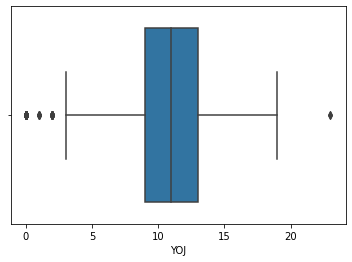

In [19]:
sns.boxplot(df_train.YOJ)

### About yoj : the yoj is year of joining thr customer, 

In [20]:
df_train['YOJ'] = df_train['YOJ'].replace(np.nan, df_train['YOJ'].median())

# 2. OCCUPATION

<AxesSubplot:>

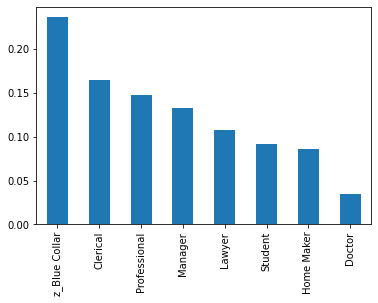

In [21]:
df_train['OCCUPATION'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:xlabel='OCCUPATION', ylabel='count'>

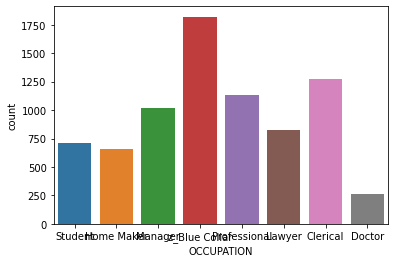

In [22]:
sns.countplot(df_train.OCCUPATION)

# 3. CAR AGE

<AxesSubplot:xlabel='CAR_AGE'>

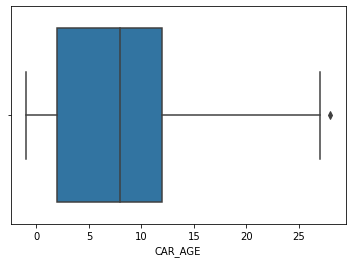

In [23]:
sns.boxplot(df_train.CAR_AGE)

In [24]:
df_train['CAR_AGE'] = df_train['CAR_AGE'].replace(np.nan, df_train['CAR_AGE'].median())

In [25]:
#??sns.countplot

In [26]:
df_train.isnull().sum()

ID              0
KIDSDRIV        0
AGE             6
HOMEKIDS        0
YOJ             0
INCOME        462
PARENT1         0
HOME_VAL      458
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    530
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE         0
CLAIM_FLAG      0
dtype: int64

In [27]:
# df_train['OCCUPATION'].replace(np.NaN, df_train['OCCUPATION'].mode()).head(20)

In [28]:
# Check for missing or null values
df_train['YOJ'].isnull().sum()

0

In [29]:
df_train['CAR_AGE'].isnull().sum()

0

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8241 non-null   int64  
 1   KIDSDRIV    8241 non-null   int64  
 2   AGE         8235 non-null   float64
 3   HOMEKIDS    8241 non-null   int64  
 4   YOJ         8241 non-null   float64
 5   INCOME      7779 non-null   object 
 6   PARENT1     8241 non-null   object 
 7   HOME_VAL    7783 non-null   object 
 8   MSTATUS     8241 non-null   object 
 9   GENDER      8241 non-null   object 
 10  EDUCATION   8241 non-null   object 
 11  OCCUPATION  7711 non-null   object 
 12  TRAVTIME    8241 non-null   int64  
 13  CAR_USE     8241 non-null   object 
 14  BLUEBOOK    8241 non-null   object 
 15  TIF         8241 non-null   int64  
 16  CAR_TYPE    8241 non-null   object 
 17  RED_CAR     8241 non-null   object 
 18  OLDCLAIM    8241 non-null   object 
 19  CLM_FREQ    8241 non-null  

# missing values(columns) :  
* YOJ :  num
* INCOME : object 
* HOME_AVL : object
* OCCUPATION: object
* CAR_AGE: float 

**Impute missing values with appropriate values**

In [31]:
df_train.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [32]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df_train, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    df_train[col]=df_train[col].str.replace('$','')
    df_train[col]=df_train[col].astype(str).str.replace(",", "")
#     df_train[col]=df_train[col].astype(int)
#     df['Unique ID'] = df['Unique ID'].astype(int)
    return df_train[col]    
    


In [33]:
# #Replacing spaces with 'NaN' in test dataset
# df_train['INCOME'].replace(' ',np.NaN, inplace=True)
df_train['OCCUPATION'].replace(' ',np.NaN, inplace=True)

In [34]:
clean_dollar(df_train, 'INCOME')

0        4701
1       10232
2       66200
3       34056
4       45734
        ...  
8236      nan
8237    67359
8238    30129
8239    74315
8240     5336
Name: INCOME, Length: 8241, dtype: object

In [35]:
df_train['INCOME'].head(50)

0       4701
1      10232
2      66200
3      34056
4      45734
5          0
6        nan
7      93658
8          0
9      28573
10     94403
11     42815
12     83967
13     30969
14    115656
15      4034
16    102445
17     71512
18     38589
19    108139
20     62849
21     67702
22     28409
23     78599
24     22626
25     52073
26     99247
27     58628
28     48812
29     10720
30    134640
31     23772
32       nan
33     57387
34    101806
35     50718
36     74501
37     53431
38     82565
39     40716
40    165193
41     80475
42     45669
43     69620
44     18261
45     36504
46    157057
47     25738
48     67278
49     49010
Name: INCOME, dtype: object

In [36]:
df_train['INCOME'].value_counts()

0         621
nan       462
61790       5
64916       4
142297      3
         ... 
22633       1
53261       1
65082       1
102272      1
40363       1
Name: INCOME, Length: 6650, dtype: int64

In [37]:

clean_dollar(df_train, 'HOME_VAL')
clean_dollar(df_train, 'OLDCLAIM')
clean_dollar(df_train, 'CLM_AMT')
clean_dollar(df_train, 'BLUEBOOK')

0        5900
1       24470
2       17260
3        6180
4        9870
        ...  
8236    10250
8237    13140
8238    18950
8239    24230
8240    11650
Name: BLUEBOOK, Length: 8241, dtype: object

In [38]:
df_train['INCOME'].mode()

0    0
dtype: object

In [39]:
# treat_null_values(df_train['OCCUPATION'], 'ffill')

# filling with Unknown class
df_train['OCCUPATION'] = df_train['OCCUPATION'].fillna("Unknown")
# df_train['INCOME'] = df_train['INCOME'].fillna(df_train['INCOME'].mode())
# df_train['INCOME'].fillna(df_train.INCOME.mode(), inplace=True)
df_train['INCOME'].fillna("0")
df_train['AGE'] = df_train['AGE'].fillna("Unknown")

In [40]:
df_train['OCCUPATION'].isnull().sum()

0

In [41]:
dc = df_train['INCOME'].value_counts().sum()

In [42]:
df_train['INCOME'].head(50)

0       4701
1      10232
2      66200
3      34056
4      45734
5          0
6        nan
7      93658
8          0
9      28573
10     94403
11     42815
12     83967
13     30969
14    115656
15      4034
16    102445
17     71512
18     38589
19    108139
20     62849
21     67702
22     28409
23     78599
24     22626
25     52073
26     99247
27     58628
28     48812
29     10720
30    134640
31     23772
32       nan
33     57387
34    101806
35     50718
36     74501
37     53431
38     82565
39     40716
40    165193
41     80475
42     45669
43     69620
44     18261
45     36504
46    157057
47     25738
48     67278
49     49010
Name: INCOME, dtype: object

In [43]:
print(dc)

8241


In [44]:
df_train['INCOME'].isnull().sum()

0

In [45]:
df_train.isnull().sum()

ID            0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
dtype: int64

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8241 non-null   int64  
 1   KIDSDRIV    8241 non-null   int64  
 2   AGE         8241 non-null   object 
 3   HOMEKIDS    8241 non-null   int64  
 4   YOJ         8241 non-null   float64
 5   INCOME      8241 non-null   object 
 6   PARENT1     8241 non-null   object 
 7   HOME_VAL    8241 non-null   object 
 8   MSTATUS     8241 non-null   object 
 9   GENDER      8241 non-null   object 
 10  EDUCATION   8241 non-null   object 
 11  OCCUPATION  8241 non-null   object 
 12  TRAVTIME    8241 non-null   int64  
 13  CAR_USE     8241 non-null   object 
 14  BLUEBOOK    8241 non-null   object 
 15  TIF         8241 non-null   int64  
 16  CAR_TYPE    8241 non-null   object 
 17  RED_CAR     8241 non-null   object 
 18  OLDCLAIM    8241 non-null   object 
 19  CLM_FREQ    8241 non-null  

## GRAPHICAL REPRESENTATION

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

### UNIVARIATE

In [47]:
df_train.corr()
# EVEN HEATMAP CAN BE USED

,ID,KIDSDRIV,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
ID,1.000000,-0.008499,-0.000626,-0.018831,0.004866,-0.017859,-0.001256,0.000960,0.001991,-0.002985
KIDSDRIV,-0.008499,1.000000,0.462011,0.044730,0.014851,-0.005300,0.043340,0.051921,-0.052109,0.067292
HOMEKIDS,-0.000626,0.462011,1.000000,0.077499,0.003373,0.010615,0.040866,0.069481,-0.152013,0.069923
YOJ,-0.018831,0.044730,0.077499,1.000000,-0.008116,0.019948,-0.015013,-0.041936,0.052464,-0.016244
TRAVTIME,0.004866,0.014851,0.003373,-0.008116,1.000000,-0.015989,0.009785,0.013628,-0.030528,0.042425
TIF,-0.017859,-0.005300,0.010615,0.019948,-0.015989,1.000000,-0.021340,-0.036186,0.002082,-0.050506
CLM_FREQ,-0.001256,0.043340,0.040866,-0.015013,0.009785,-0.021340,1.000000,0.405115,-0.021157,0.148269
MVR_PTS,0.000960,0.051921,0.069481,-0.041936,0.013628,-0.036186,0.405115,1.000000,-0.039164,0.147199
CAR_AGE,0.001991,-0.052109,-0.152013,0.052464,-0.030528,0.002082,-0.021157,-0.039164,1.000000,-0.066202
CLAIM_FLAG,-0.002985,0.067292,0.069923,-0.016244,0.042425,-0.050506,0.148269,0.147199,-0.066202,1.000000


**UNIVARIATE AND BIVARIATE ANALYSIS**

# 4. CLAIM FLAG - TARGET

<AxesSubplot:>

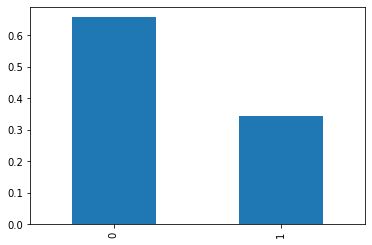

In [48]:
df_train['CLAIM_FLAG'].value_counts(normalize = True).plot(kind = 'bar')


### Highly imbalanced dataset 
- target value
- 0: 
- 1: 


In [49]:
import seaborn as sns

# 5. GENDER

<AxesSubplot:xlabel='GENDER', ylabel='CLAIM_FLAG'>

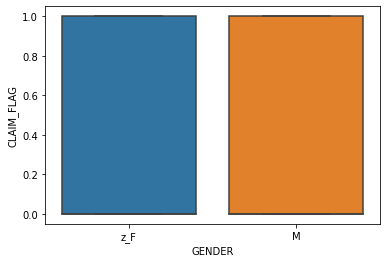

In [50]:
sns.boxplot(x='GENDER', y='CLAIM_FLAG', data=df_train)

<AxesSubplot:>

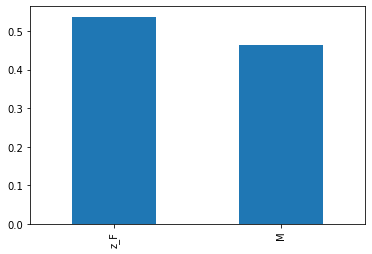

In [51]:
df_train['GENDER'].value_counts(normalize = True).plot(kind = 'bar')

# 6. PARENT1

<AxesSubplot:>

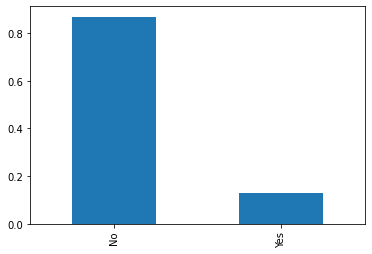

In [52]:
df_train['PARENT1'].value_counts(normalize = True).plot(kind = 'bar')

# 7. MSTATUS

<AxesSubplot:>

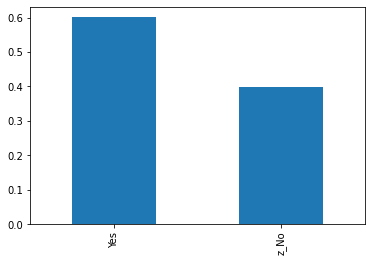

In [53]:
df_train['MSTATUS'].value_counts(normalize = True).plot(kind = 'bar')

# 8. EDUCATION

<AxesSubplot:>

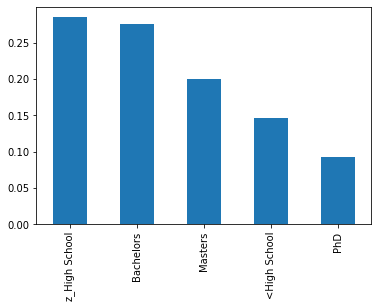

In [54]:
df_train['EDUCATION'].value_counts(normalize = True).plot(kind = 'bar')

# 9. CAR TYPE

<AxesSubplot:>

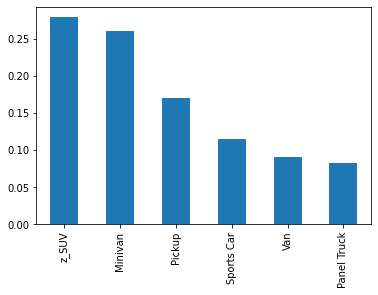

In [55]:
df_train['CAR_TYPE'].value_counts(normalize = True).plot(kind = 'bar')

# 10. RED CAR

<AxesSubplot:>

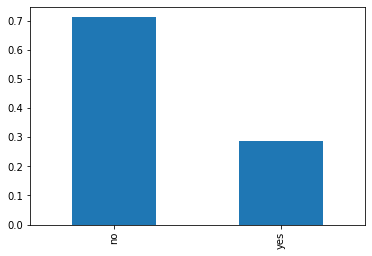

In [56]:
df_train['RED_CAR'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:>

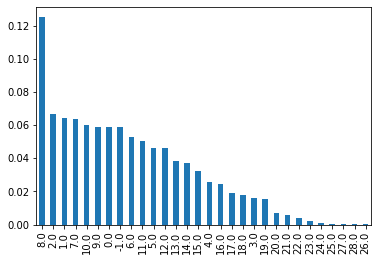

In [57]:
df_train['CAR_AGE'].value_counts(normalize = True).plot(kind = 'bar')

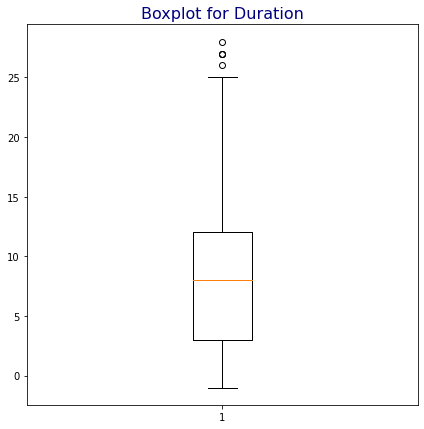

In [84]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(df_train['CAR_AGE'])
plt.title('Boxplot for Duration', color='Navy', fontsize=16)
plt.show()

# 11. CAR USE

<AxesSubplot:>

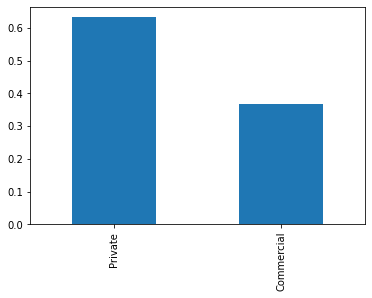

In [58]:
df_train['CAR_USE'].value_counts(normalize = True).plot(kind = 'bar')

# 12. HOMEKIDS

<AxesSubplot:>

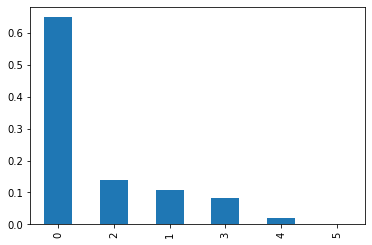

In [59]:
df_train['HOMEKIDS'].value_counts(normalize = True).plot(kind = 'bar')

# 13. REVOKED

<AxesSubplot:>

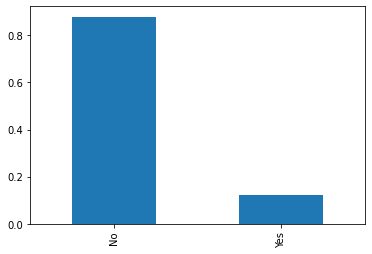

In [60]:
df_train['REVOKED'].value_counts(normalize = True).plot(kind = 'bar')

# 14. KIDS

<AxesSubplot:>

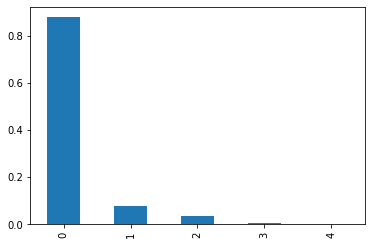

In [72]:
df_train['KIDSDRIV'].value_counts(normalize = True).plot(kind = 'bar')

# 15. TRAVEL TIME

<AxesSubplot:>

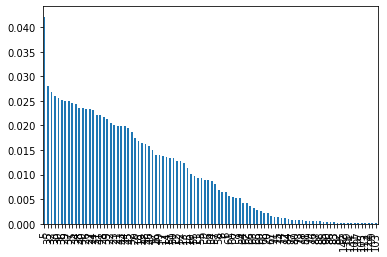

In [77]:
df_train['TRAVTIME'].value_counts(normalize = True).plot(kind = 'bar')

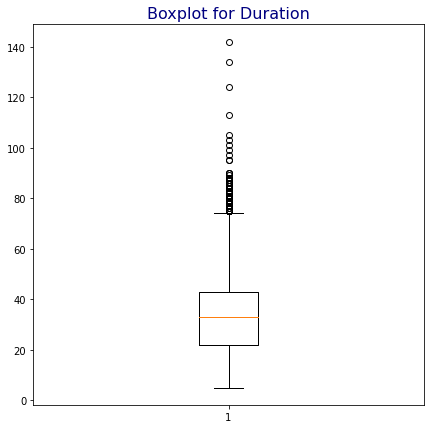

In [83]:
fig = plt.figure(figsize=(7,7))
plt.boxplot(df_train['TRAVTIME'])
plt.title('Boxplot for Duration', color='Navy', fontsize=16)
plt.show()

# 16.HOME KIDS

<AxesSubplot:>

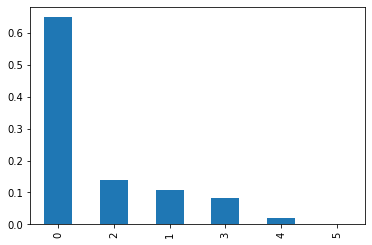

In [73]:
df_train['HOMEKIDS'].value_counts(normalize = True).plot(kind = 'bar')

# 17. 

<AxesSubplot:>

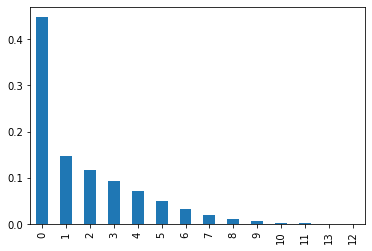

In [78]:
df_train['MVR_PTS'].value_counts(normalize = True).plot(kind = 'bar')

# 18. 

<AxesSubplot:>

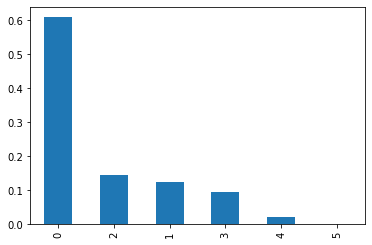

In [79]:
df_train['CLM_FREQ'].value_counts(normalize = True).plot(kind = 'bar')

# 19. 

<AxesSubplot:>

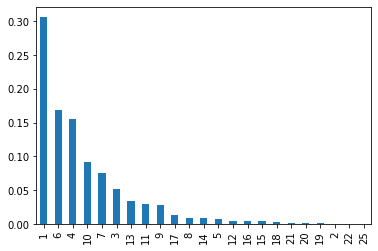

In [80]:
df_train['TIF'].value_counts(normalize = True).plot(kind = 'bar')

In [61]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# COVERT STR TO INT
* INCOME
* CLM AMT
* BLUEBOOK
* HOME VAL

# 20. INCCOME

In [63]:
df_train['INCOME']= df_train['INCOME'].str.replace(',', '').str.strip('$').astype(float)

Age distribution according to Response


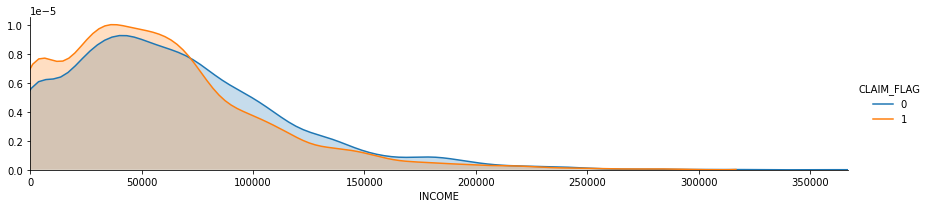

In [64]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="CLAIM_FLAG",aspect = 4)
facetgrid.map(sns.kdeplot,"INCOME",shade = True)
facetgrid.set(xlim = (0,df_train["INCOME"].max()))
facetgrid.add_legend()
plt.show()

# 21. CLAIM AMOUNT

In [65]:
df_train['CLM_AMT']= df_train['CLM_AMT'].str.replace(',', '').str.strip('$').astype(float)

Age distribution according to Response


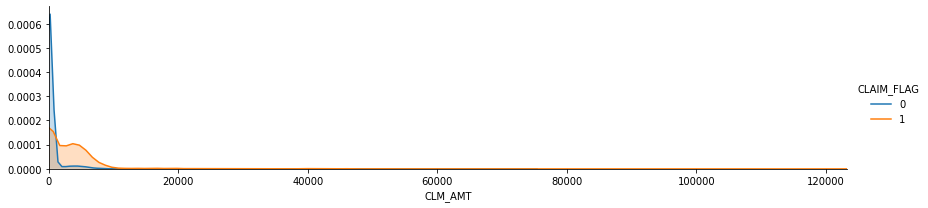

In [66]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="CLAIM_FLAG",aspect = 4)
facetgrid.map(sns.kdeplot,"CLM_AMT",shade = True)
facetgrid.set(xlim = (0,df_train["CLM_AMT"].max()))
facetgrid.add_legend()
plt.show()

# 22. BLUEBOOK

In [67]:
df_train['BLUEBOOK']= df_train['BLUEBOOK'].str.replace(',', '').str.strip('$').astype(float)

Age distribution according to Response


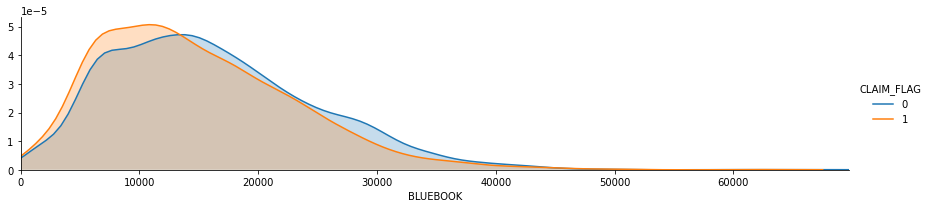

In [68]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="CLAIM_FLAG",aspect = 4)
facetgrid.map(sns.kdeplot,"BLUEBOOK",shade = True)
facetgrid.set(xlim = (0,df_train["BLUEBOOK"].max()))
facetgrid.add_legend()
plt.show()

# 23. HOME VALUE

In [69]:
df_train['HOME_VAL']= df_train['HOME_VAL'].str.replace(',', '').str.strip('$').astype(float)

Age distribution according to Response


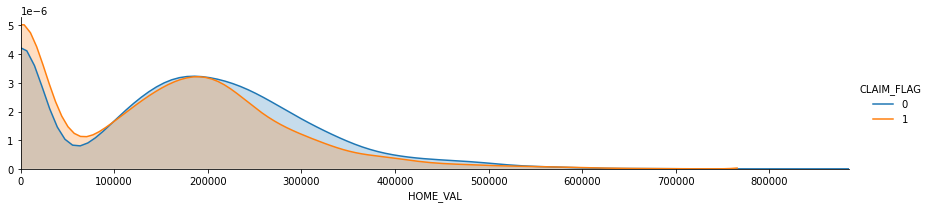

In [70]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="CLAIM_FLAG",aspect = 4)
facetgrid.map(sns.kdeplot,"HOME_VAL",shade = True)
facetgrid.set(xlim = (0,df_train["HOME_VAL"].max()))
facetgrid.add_legend()
plt.show()

# 24. OLD CLAIM

In [81]:
df_train['OLDCLAIM']= df_train['OLDCLAIM'].str.replace(',', '').str.strip('$').astype(float)

Age distribution according to Response


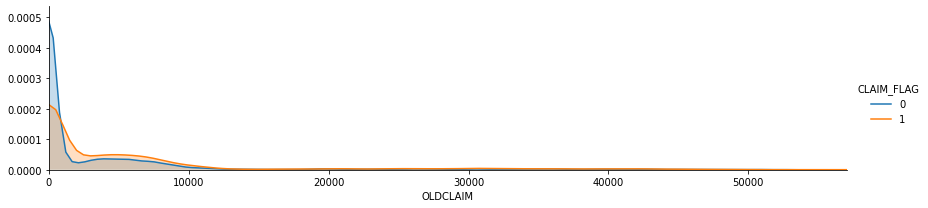

In [82]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df_train,hue="CLAIM_FLAG",aspect = 4)
facetgrid.map(sns.kdeplot,"OLDCLAIM",shade = True)
facetgrid.set(xlim = (0,df_train["OLDCLAIM"].max()))
facetgrid.add_legend()
plt.show()

In [92]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [93]:
df_train.head()

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,...,OCCUPATION_Unknown,OCCUPATION_z_Blue Collar,CAR_USE_Private,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_yes,REVOKED_Yes
0,531817639,1,3,9.0,4701.0,0.0,12,5900.0,1,0.0,...,0,0,1,0,0,1,0,0,0,0
1,738075150,0,0,7.0,10232.0,129979.0,33,24470.0,16,5458.0,...,0,0,1,0,0,0,0,0,0,0
2,176935775,0,2,17.0,66200.0,223960.0,53,17260.0,13,0.0,...,0,0,1,0,0,0,0,1,0,0
3,195054268,2,2,13.0,34056.0,122908.0,29,6180.0,4,502.0,...,0,1,0,0,0,1,0,0,0,0
4,764551255,0,0,11.0,45734.0,222653.0,5,9870.0,1,3296.0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Columns: 102 entries, ID to REVOKED_Yes
dtypes: float64(7), int64(8), uint8(87)
memory usage: 1.6 MB


In [ ]:
# Code starts here











# Code ends here.

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [ ]:
# Code Starts here



# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [ ]:
# Code Starts here



# Code ends here